### Heart Rate Forecast - Regression Problem

In [202]:
# Import Dependancies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Ridge,Lasso
%matplotlib inline


In [203]:
import warnings
warnings.filterwarnings("ignore")

In [204]:
fdf_train=pd.read_csv("Train Data/frequency_domain_features_train.csv")
fdf_train.head()

,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF
0,89df2855-56eb-4706-a23b-b39363dd605a,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055
2,c2d5d102-967c-487d-88f2-8b005a449f3e,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607
3,37eabc44-1349-4040-8896-0d113ad4811f,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912


In [205]:
hr_train=pd.read_csv("Train Data/heart_rate_non_linear_features_train.csv")
hr_train.head()

,uuid,SD1,SD2,sampen,higuci,datasetId,condition
0,89df2855-56eb-4706-a23b-b39363dd605a,11.001565,199.061782,2.139754,1.163485,2,no stress
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,9.170129,114.634458,2.174499,1.084711,2,interruption
2,c2d5d102-967c-487d-88f2-8b005a449f3e,11.533417,118.939253,2.135350,1.176315,2,interruption
3,37eabc44-1349-4040-8896-0d113ad4811f,11.119476,127.318597,2.178341,1.179688,2,no stress
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,13.590641,87.718281,2.221121,1.249612,2,no stress


In [206]:
td_train=pd.read_csv("Train Data/time_domain_features_train.csv")
td_train.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,uuid
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218,89df2855-56eb-4706-a23b-b39363dd605a
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286,80c795e4-aa56-4cc0-939c-19634b89cbb2
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813,c2d5d102-967c-487d-88f2-8b005a449f3e
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138,37eabc44-1349-4040-8896-0d113ad4811f
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7


In [207]:
merge1=fdf_train.set_index('uuid').join(hr_train.set_index('uuid'))

In [208]:
train_df=merge1.join(td_train.set_index('uuid'))
train_df.head()

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
uuid,,,,,,,,,,,,,,,,,,,,,
89df2855-56eb-4706-a23b-b39363dd605a,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522603,0.421047,1.514737,3686.666157,65.018055,...,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218
80c795e4-aa56-4cc0-939c-19634b89cbb2,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,...,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286
c2d5d102-967c-487d-88f2-8b005a449f3e,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,...,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813
37eabc44-1349-4040-8896-0d113ad4811f,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,...,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138
aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,...,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252


In [209]:
train_df.shape

(369289, 36)

In [210]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 369289 entries, 89df2855-56eb-4706-a23b-b39363dd605a to 1f2eb52d-4f09-4921-a383-ef1bc6221789
Data columns (total 36 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   VLF                369289 non-null  float64
 1   VLF_PCT            369289 non-null  float64
 2   LF                 369289 non-null  float64
 3   LF_PCT             369289 non-null  float64
 4   LF_NU              369289 non-null  float64
 5   HF                 369289 non-null  float64
 6   HF_PCT             369289 non-null  float64
 7   HF_NU              369289 non-null  float64
 8   TP                 369289 non-null  float64
 9   LF_HF              369289 non-null  float64
 10  HF_LF              369289 non-null  float64
 11  SD1                369289 non-null  float64
 12  SD2                369289 non-null  float64
 13  sampen             369289 non-null  float64
 14  higuci             369289 non-null  floa

In [211]:
print(train_df['datasetId'].value_counts())
print(train_df.index.nunique())

2    369289
Name: datasetId, dtype: int64
369289


In [212]:
train_df=train_df.reset_index(drop=True)
train_df=train_df.drop(['datasetId'],axis=1)


In [213]:
train_df.isnull().sum()

VLF                  0
VLF_PCT              0
LF                   0
LF_PCT               0
LF_NU                0
HF                   0
HF_PCT               0
HF_NU                0
TP                   0
LF_HF                0
HF_LF                0
SD1                  0
SD2                  0
sampen               0
higuci               0
condition            0
MEAN_RR              0
MEDIAN_RR            0
SDRR                 0
RMSSD                0
SDSD                 0
SDRR_RMSSD           0
HR                   0
pNN25                0
pNN50                0
KURT                 0
SKEW                 0
MEAN_REL_RR          0
MEDIAN_REL_RR        0
SDRR_REL_RR          0
RMSSD_REL_RR         0
SDSD_REL_RR          0
SDRR_RMSSD_REL_RR    0
KURT_REL_RR          0
SKEW_REL_RR          0
dtype: int64

In [214]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
VLF,369289.0,2199.580170,1815.773422,159.480176,1001.189280,1.667903e+03,2654.121052,12617.977191
VLF_PCT,369289.0,64.289242,16.774844,19.031219,52.909877,6.635024e+01,76.825032,97.738848
LF,369289.0,946.530252,574.171780,90.048557,545.449386,7.827163e+02,1201.432256,3291.548112
LF_PCT,369289.0,34.095182,16.040290,2.165119,22.305936,3.204703e+01,44.647115,77.928847
LF_NU,369289.0,95.566718,4.123365,69.879083,93.645734,9.664314e+01,98.771946,99.987175
HF,369289.0,39.245603,45.398869,0.061783,10.720312,2.484194e+01,45.272368,364.486936
HF_PCT,369289.0,1.615576,1.761073,0.002150,0.346803,1.039513e+00,2.245115,13.095664
HF_NU,369289.0,4.433282,4.123365,0.012825,1.228054,3.356860e+00,6.354266,30.120917
TP,369289.0,3185.356025,1923.227187,377.692795,1828.147788,2.796857e+03,4052.260157,13390.684098
LF_HF,369289.0,115.977200,360.855129,2.319952,14.737458,2.878975e+01,80.429614,7796.443096


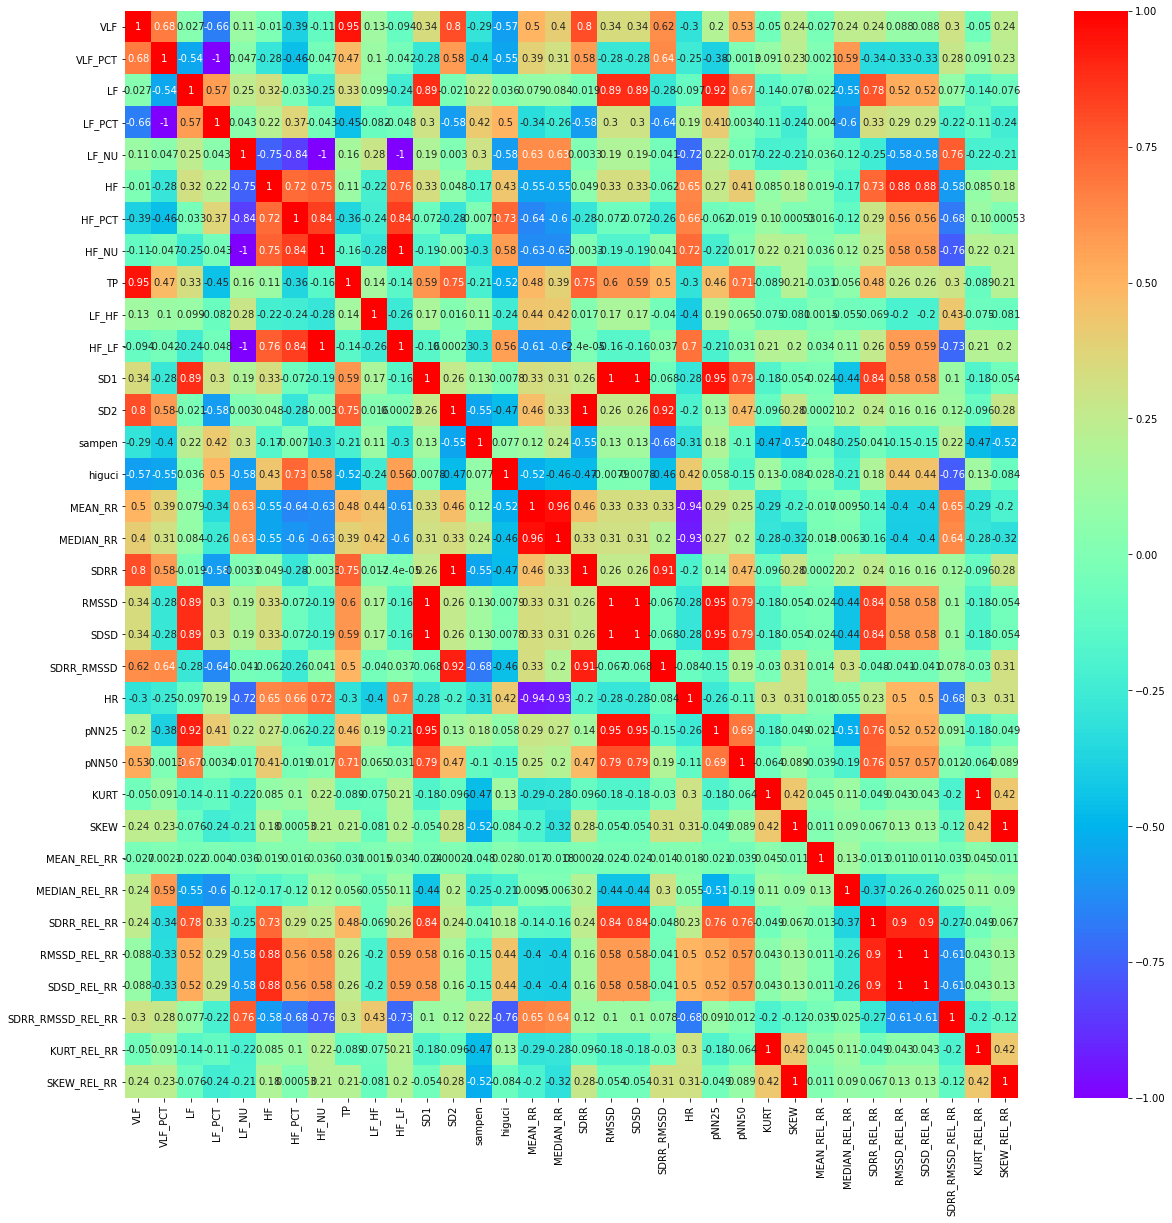

In [215]:
plt.figure(figsize=(20,20))
sns.heatmap(train_df.corr(),annot=True,cmap='rainbow')

In [216]:
corr_df=train_df.corr().abs()
corr_df.head()

,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
VLF,1.000000,0.676628,0.026521,0.664830,0.105044,0.010441,0.389684,0.105044,0.951800,0.126668,...,0.050392,0.236819,0.026638,0.237918,0.242427,0.087994,0.087993,0.303226,0.050392,0.236819
VLF_PCT,0.676628,1.000000,0.541976,0.995240,0.046868,0.283068,0.460465,0.046868,0.470337,0.103768,...,0.090900,0.228209,0.002054,0.588470,0.343214,0.333824,0.333824,0.277593,0.090900,0.228209
LF,0.026521,0.541976,1.000000,0.570404,0.247482,0.315662,0.032871,0.247482,0.331037,0.099452,...,0.144318,0.075650,0.022014,0.550557,0.783464,0.524338,0.524337,0.077445,0.144318,0.075650
LF_PCT,0.664830,0.995240,0.570404,1.000000,0.043265,0.216789,0.371761,0.043265,0.452276,0.082040,...,0.106355,0.238718,0.003950,0.602589,0.327483,0.288087,0.288087,0.215372,0.106355,0.238718
LF_NU,0.105044,0.046868,0.247482,0.043265,1.000000,0.749237,0.840496,1.000000,0.155373,0.281325,...,0.216003,0.205864,0.036098,0.121910,0.247067,0.582438,0.582438,0.760120,0.216003,0.205864


Many Features seem to be highly correlated. We can remove them, so that we could have a managable dataset.

In [217]:
#sorting corrolation of target variable and predictors 
corr =corr_df.corrwith(corr_df["HR"]).sort_values(ascending=False)

In [218]:
co_df=pd.DataFrame(corr)
co_df.columns=['corr']

In [219]:
selected_features=co_df.loc[co_df['corr']>=0.50]
selected_features.reset_index()


,index,corr
0,HR,1.000000
1,MEDIAN_RR,0.963231
2,MEAN_RR,0.894705
3,HF_NU,0.860224
4,LF_NU,0.860224
5,SDRR_RMSSD_REL_RR,0.858907
6,HF_LF,0.850894
7,HF_PCT,0.775173
8,HF,0.687687
9,LF_HF,0.601420


In [220]:
high_corr= selected_features.index.tolist()
high_corr

['HR',
 'MEDIAN_RR',
 'MEAN_RR',
 'HF_NU',
 'LF_NU',
 'SDRR_RMSSD_REL_RR',
 'HF_LF',
 'HF_PCT',
 'HF',
 'LF_HF']

In [227]:
# filtering out variables highly correlated 
c=corr_df.unstack()
co=c.sort_values(kind='quicksort')
co_df=pd.DataFrame(co)
co_df.columns=['corr']


In [228]:
remove_features=co_df.loc[co_df['corr']>=0.75]
remove_features

,,corr
pNN50,SDRR_REL_RR,0.756253
SDRR_REL_RR,pNN50,0.756253
HF_LF,HF,0.757545
HF,HF_LF,0.757545
SDRR_RMSSD_REL_RR,HF_NU,0.760120
...,...,...
SDRR_RMSSD,SDRR_RMSSD,1.000000
SDSD,SDSD,1.000000
SKEW,SKEW,1.000000
LF_NU,HF_NU,1.000000


In [229]:
remove_features.reset_index(level=[0,1],inplace=True)
remove_features.rename(columns={'level_0':'feature1','level_1':'feature2'},inplace=True)
remove_features=remove_features[remove_features['feature1']!=remove_features['feature2']].reset_index(drop=True)
remove_features.drop_duplicates(subset='corr',keep='first').reset_index(drop=True)
remove_features

,feature1,feature2,corr
0,pNN50,SDRR_REL_RR,0.756253
1,SDRR_REL_RR,pNN50,0.756253
2,HF_LF,HF,0.757545
3,HF,HF_LF,0.757545
4,SDRR_RMSSD_REL_RR,HF_NU,0.760120
...,...,...,...
87,KURT_REL_RR,KURT,1.000000
88,SKEW,SKEW_REL_RR,1.000000
89,KURT,KURT_REL_RR,1.000000
90,LF_NU,HF_NU,1.000000


In [153]:
remove_features.shape

(92, 3)

In [231]:
remove_list=remove_features['feature2'].to_list()
remove_list=list(set(remove_list))
remove_list

['VLF_PCT',
 'higuci',
 'SD2',
 'RMSSD_REL_RR',
 'LF_PCT',
 'SKEW',
 'SDRR_REL_RR',
 'VLF',
 'SDSD_REL_RR',
 'LF_NU',
 'HR',
 'LF',
 'SDRR',
 'SD1',
 'SDSD',
 'KURT_REL_RR',
 'HF_NU',
 'HF_LF',
 'HF',
 'pNN25',
 'SKEW_REL_RR',
 'pNN50',
 'HF_PCT',
 'MEDIAN_RR',
 'SDRR_RMSSD_REL_RR',
 'MEAN_RR',
 'TP',
 'RMSSD',
 'KURT',
 'SDRR_RMSSD']

In [232]:
## excluding the Target Variable
remove_list.remove('HR')
len(remove_list)

29

The above 29 columns need to be removed

In [233]:
Intersections= [x for x in high_corr if x in remove_list]
# Or list(set(high_corr).intersection(set(remove_list)))

In [234]:
remove_list = [x for x in remove_list if x not in Intersections]

In [235]:
remove_list

['VLF_PCT',
 'higuci',
 'SD2',
 'RMSSD_REL_RR',
 'LF_PCT',
 'SKEW',
 'SDRR_REL_RR',
 'VLF',
 'SDSD_REL_RR',
 'LF',
 'SDRR',
 'SD1',
 'SDSD',
 'KURT_REL_RR',
 'pNN25',
 'SKEW_REL_RR',
 'pNN50',
 'TP',
 'RMSSD',
 'KURT',
 'SDRR_RMSSD']

In [236]:
train_removedFeatures=train_df.drop(remove_list,axis=1)
train_removedFeatures.shape

(369289, 14)

### Univariate Analysis

Univariate Analysis on the above feature reduced and sampled dataset - sample_train, which contains 14722 rows and 5 columns 

##### Comparing the Univariate Dist of the population and the sample

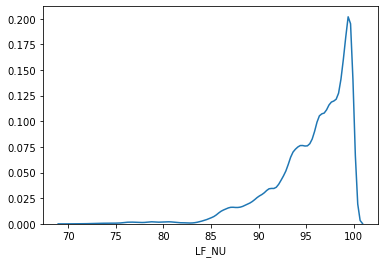

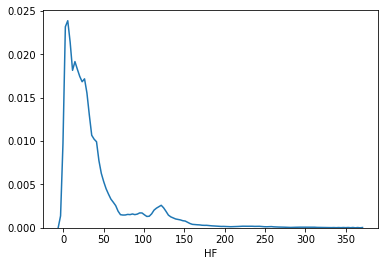

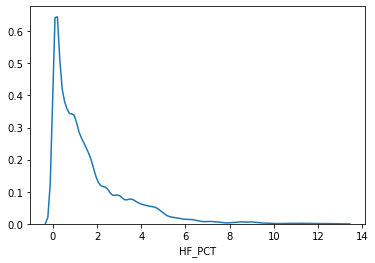

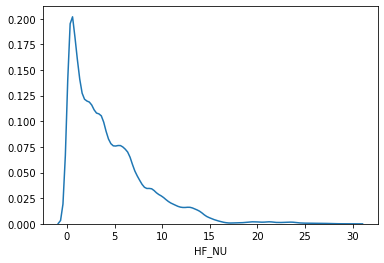

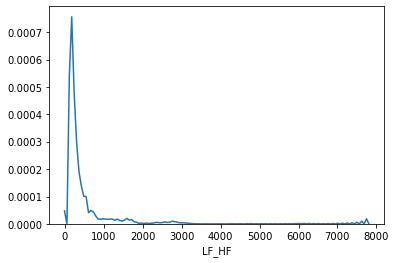

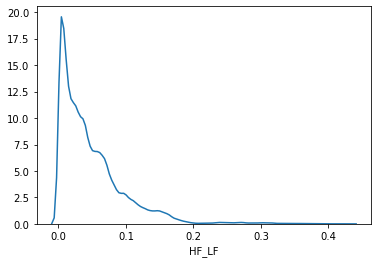

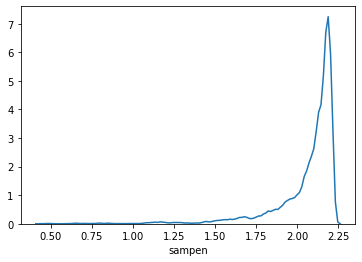

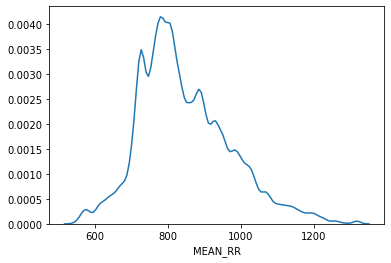

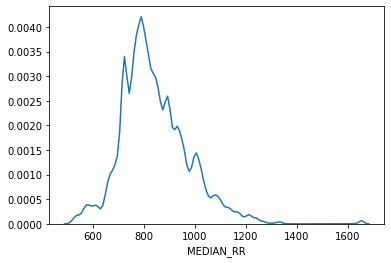

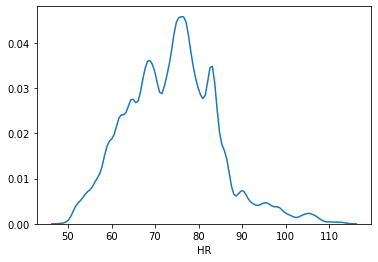

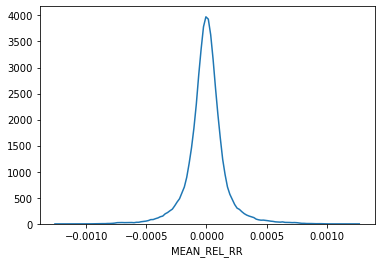

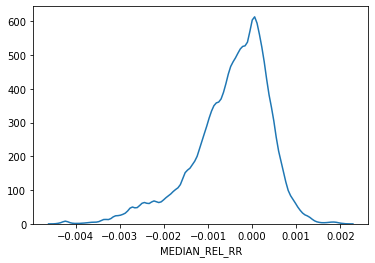

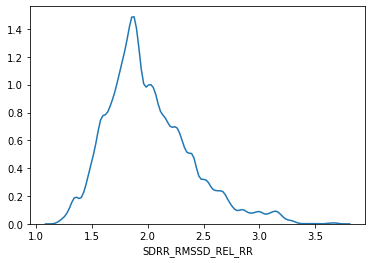

In [237]:
## Population distplots
num_features=train_removedFeatures.drop('condition',axis=1)
for i in num_features.columns:
    sns.distplot(num_features[i],hist=False)
    plt.show()

The distributions of the population and sample match well. So, our sample is random and is a good representation of the Original dataset.

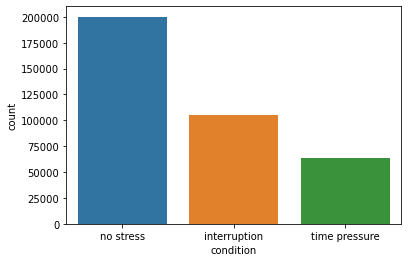

In [238]:
sns.countplot(train_df['condition'])


### Bivariate Analysis

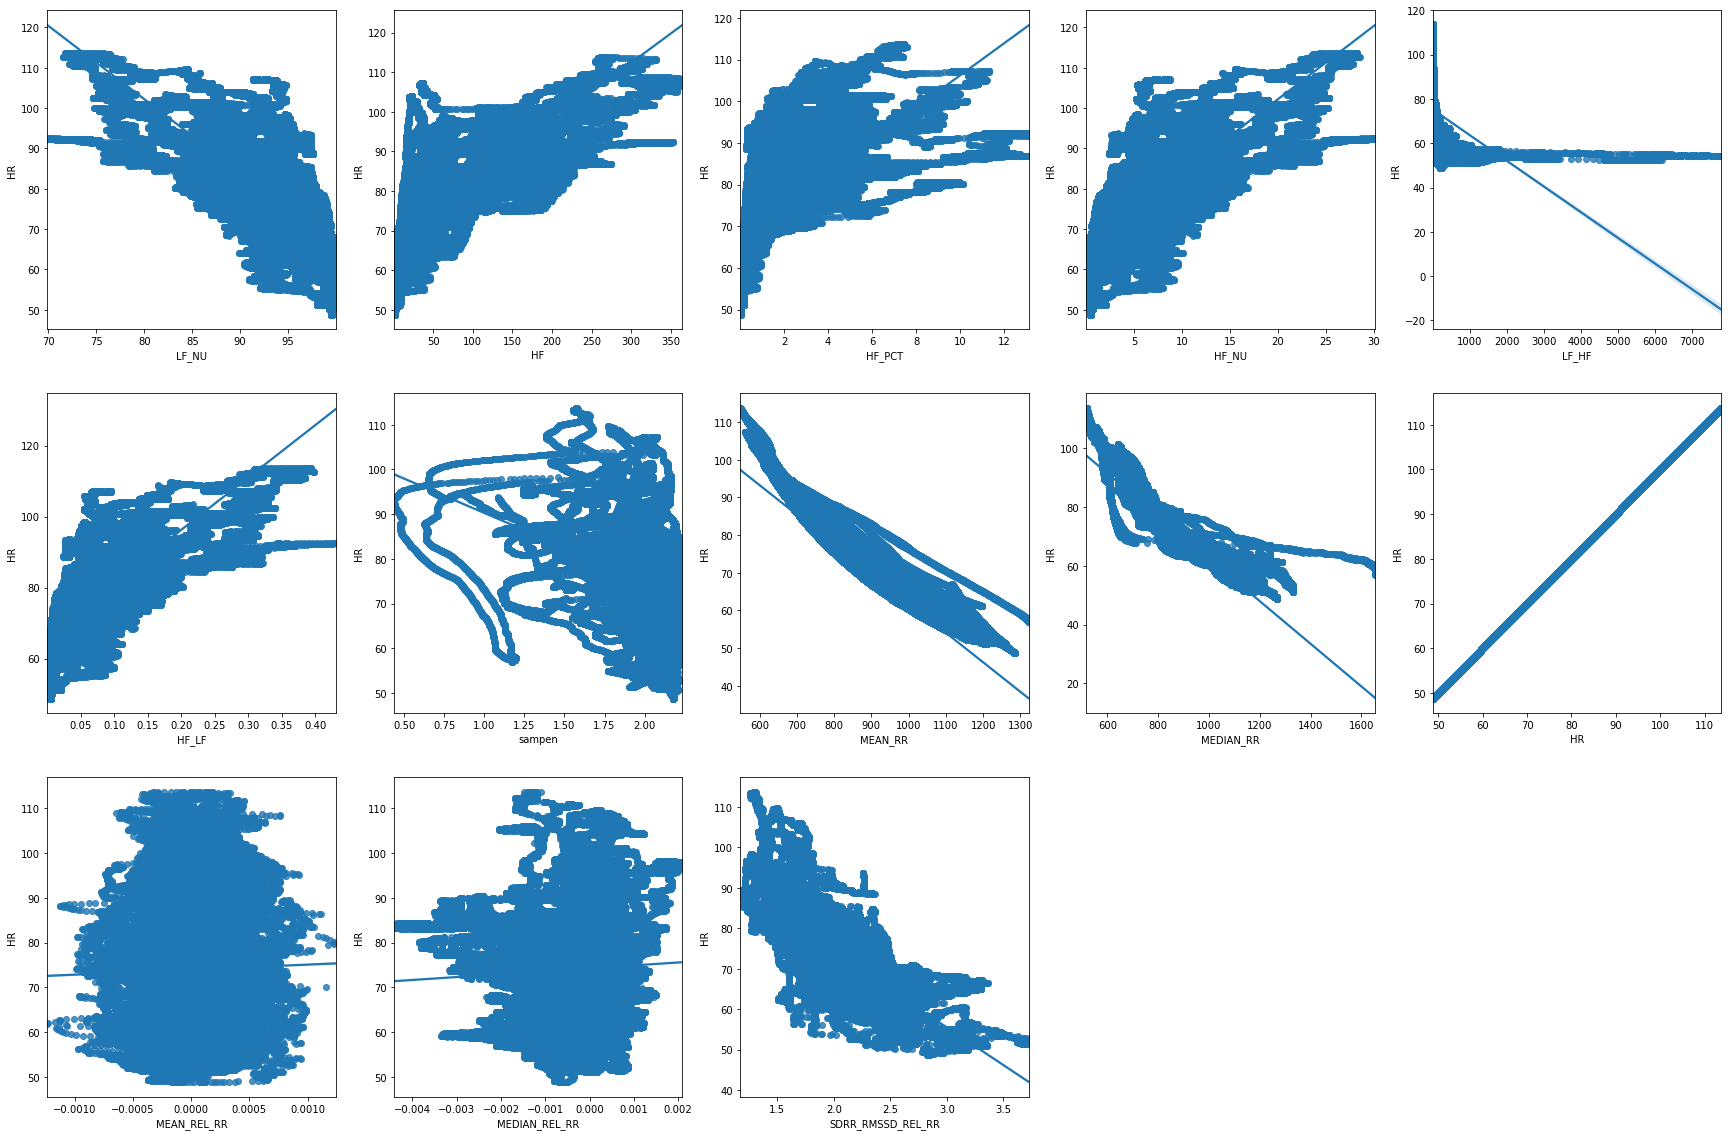

In [182]:
plt.figure(figsize=(30,20))
pos=1
for i in num_features.columns:
    plt.subplot(3,5,pos)
    sns.regplot(x=i,y='HR',data=num_features)
    pos=pos+1

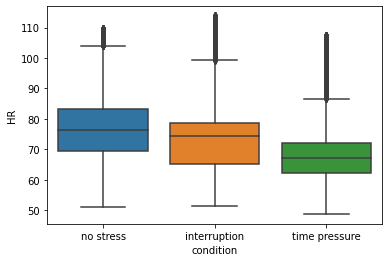

In [183]:
sns.boxplot(y='HR',x='condition',data=train_removedFeatures)

In [239]:
# Separating dependent and independent variables
X = train_removedFeatures.drop('HR',axis=1)
y = train_removedFeatures['HR']

In [240]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.3, random_state=7)

In [241]:
from sklearn.preprocessing import LabelEncoder
### label encode the categorical values and convert them to numbers 
le = LabelEncoder()
le.fit(X_train['condition'].astype(str))
X_train['condition'] = le.transform(X_train['condition'].astype(str))
X_test['condition'] = le.transform( X_test['condition'].astype(str))

In [242]:
X_train.dtypes

LF_NU                float64
HF                   float64
HF_PCT               float64
HF_NU                float64
LF_HF                float64
HF_LF                float64
sampen               float64
condition              int32
MEAN_RR              float64
MEDIAN_RR            float64
MEAN_REL_RR          float64
MEDIAN_REL_RR        float64
SDRR_RMSSD_REL_RR    float64
dtype: object

In [243]:
#Degree 2
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipeline = Pipeline([
    ('poly',PolynomialFeatures(degree=2, interaction_only=True)),
    ('reg', DecisionTreeRegressor(random_state=7))
])

pipeline.fit(X_train, y_train)

print(pipeline.score(X_train, y_train))

print(pipeline.score(X_test, y_test))

1.0
0.9999311435495226


In [244]:
#Degree 3
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=3, interaction_only=True)),
    ('reg', DecisionTreeRegressor(random_state=7))
])

pipeline.fit(X_train, y_train)

print(pipeline.score(X_train, y_train))

print(pipeline.score(X_test, y_test))

1.0
0.9998925307380945


# Model:

1. Different Models:

In [182]:
from sklearn.model_selection import cross_val_score, KFold
k = KFold(random_state=7, n_splits=5, shuffle=True)

# KFold will split the data in 5 equal parts

In [183]:
algo= []
cv_r2_mean = []
mae = []

# Blanks list to store model name, cross validated r2 score mean and MAE

In [197]:
# Linear Regression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('reg', LinearRegression())
])

pipeline.fit(X_train, y_train)


# Make predictions using the testing set
y_predict= pipeline.predict(X_test)


# The mean squared error
print('Mean squared error: %.2f'
      % mean_absolute_error(y_test, y_predict))

print('Test Accuracy: %.3f' % pipeline.score(X_test, y_test))
# algo.append('Linear Regression')
# cv_r2_mean.append(cross_val_score(pipeline, X, y, cv=k).mean())
# mae.append(mean_absolute_error(y_true, y_pred))

Mean squared error: 1.53
Test Accuracy: 0.951


In [200]:
# Decision Tree

model = DecisionTreeRegressor(random_state=7)
model.fit(X_train, y_train)
y_predict= model.predict(X_test)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_absolute_error(y_test, y_predict))
#score = cross_val_score(model, X_test, y_test)
print('Model Score: %.3f' % model.score(X_test, y_test))


# # adjust R^2
# from sklearn.metrics import r2_score   
# r2_score(y_test, y_pred)   
# print(1-(1-r2_score(y_test, y_pred))*((len(X_test)-1)/(len(X_test)-len(X_test[0])-1)))
# algo.append('Decision Tree')
# cv_mae_mean.append((-cross_val_score(model, x, y, cv=k, scoring='neg_mean_absolute_error').mean())**0.5)
# mean_absolute_error(y, predictions)

Mean squared error: 0.02
Model Score: 1.000


In [245]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=7)

model.fit(X_train, y_train)

y_predict= model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_absolute_error(y_test, y_predict))
#score = cross_val_score(model, X_test, y_test)
print('Model Score: %.3f' % model.score(X_test, y_test))


# algo.append('Random Forest')
# cv_r2_mean.append(cross_val_score(model, X, y, cv=k).mean())
# cv_rmse_mean.append((-cross_val_score(model, X, y, cv=k, scoring='neg_mean_absolute_error').mean())**0.5)

Mean squared error: 0.01
Model Score: 1.000


In [246]:
# Bagging

from sklearn.ensemble import BaggingRegressor

model = BaggingRegressor(random_state=7)

model.fit(X_train, y_train)

y_predict= model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_absolute_error(y_test, y_predict))
#score = cross_val_score(model, X_test, y_test)
print('Model Score: %.3f' % model.score(X_test, y_test))
# algo.append('Bagging')
# cv_r2_mean.append(cross_val_score(model, X, y, cv=k).mean())
# cv_rmse_mean.append((-cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error').mean())**0.5);

Mean squared error: 0.02
Model Score: 1.000


In [247]:
# AdaBoost
from sklearn.ensemble import AdaBoostRegressor

model = AdaBoostRegressor(random_state=7)

model.fit(X_train, y_train)

y_predict= model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_absolute_error(y_test, y_predict))
#score = cross_val_score(model, X_test, y_test)
print('Model Score: %.3f' % model.score(X_test, y_test))
# algo.append('AdaBoost')
# cv_r2_mean.append(cross_val_score(model, X, y, cv=k).mean())
# cv_rmse_mean.append((-cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error').mean())**0.5)

Mean squared error: 1.52
Model Score: 0.971


In [248]:
# Gradient Boosting
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor(random_state=7)

model.fit(X_train, y_train)
y_predict= model.predict(X_test)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_absolute_error(y_test, y_predict))
#score = cross_val_score(model, X_test, y_test)
print('Model Score: %.3f' % model.score(X_test, y_test))

# algo.append('Gradient Boosting')
# cv_r2_mean.append(cross_val_score(model, X, y, cv=k).mean())
# cv_mae_mean.append((-cross_val_score(model, X, y, cv=k, scoring='neg_mean_squared_error').mean())**0.5)

Mean squared error: 0.52
Model Score: 0.994


In [249]:
# DataFrame to compare results.

results = pd.DataFrame()
results['Model'] = algo
results['CV R2 score mean'] = cv_r2_mean
results['MAE'] = mae
results = results.set_index('Model')
results

NameError: name 'algo' is not defined

### GridSearchCV